In [1]:
using Optim, Calculus, LinearAlgebra, NLsolve, Plots, StatsBase,  Roots

# Parameters
β = 0.99
δ = 0.0233
α = 0.36
ϕ = 2.0

# Steady state
k_l = ((1/α)*((1/β)+δ-1))^(1/(α-1)) # from Euler on c
r_ss = α*(k_l)^(α-1)+(1-δ)
y_l = k_l^α # Prodn Fn
c_l = y_l - δ*k_l # from Budget
l_ss = (1+ϕ*c_l/((1-α)*(k_l)^α))^-1 # from Euler on l
k_ss = l_ss * k_l
y_ss = k_ss^α * l_ss^(1-α)
print(l_ss, k_ss)

# Arrays
n_K = 50
n_L = 20
n_Z = 10
grid_K = Array(range(0.8*k_ss,1.2*k_ss,n_K))
grid_Z = Array([0.985, 1.015])
grid_L = Array(range(0.8*l_ss,1.5*l_ss,n_L))
grid_Z = Array([0.95, 0.98, 1.02, 1.02])
P  = Array([[0.49, 0.51, 0.0, 0.0], [ 0.01, 0.97, 0.02, 0.0], [0.0  , 0.02, 0.97, 0.01 ],[ 0.0 , 0.0  , 0.05, 0.95]])
grid_Z = Array([0.95, 0.97, 1.15, 1.2])
grid_V = zeros(n_K,n_Z)
grid_kp = zeros(n_K,n_Z)
grid_l = zeros(n_K,n_Z)
grid_c = zeros(n_K,n_Z);

0.2993816262415004412.290609612625913

In [4]:
beta = 0.99; alpha = 1/3; delta = 0.0233; phi = 1.74;
N = 200;
kss = (1/3)*((1/alpha)*(1/beta-1+delta))^(1/(alpha-1));
kss


# Parameters
β = 0.99
δ = 0.0233
α = 1/3
ϕ = 1.74

# Steady state
k_l = ((1/α)*((1/β)+δ-1))^(1/(α-1)) # from Euler on c
r_ss = α*(k_l)^(α-1)+(1-δ)
y_l = k_l^α # Prodn Fn
c_l = y_l - δ*k_l # from Budget
l_ss = (1+ϕ*c_l/((1-α)*(k_l)^α))^-1 # from Euler on l
k_ss = l_ss * k_l
y_ss = k_ss^α * l_ss^(1-α)
print(l_ss, k_ss)

10.508904902530528

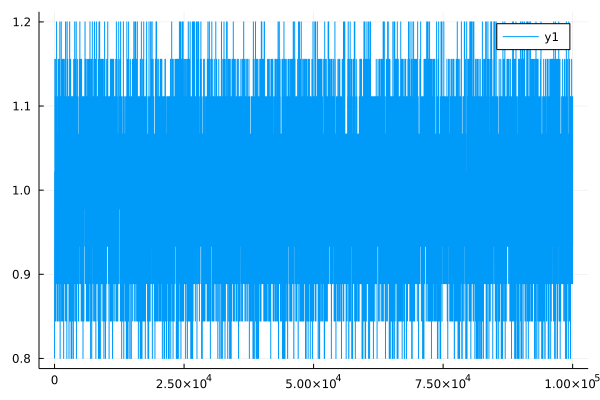

In [137]:
P = Array([[3.13828504e-01, 6.49017486e-01, 3.65651027e-02, 5.87847257e-04,
        1.05971956e-06, 2.00950251e-10, 3.88519731e-15, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [8.63118307e-02, 5.39740359e-01, 3.38038807e-01, 3.54485176e-02,
        4.59822566e-04, 6.63239117e-07, 1.00190635e-10, 1.52159646e-15,
        0.00000000e+00, 0.00000000e+00],
       [3.69290357e-03, 1.25210450e-01, 5.21295872e-01, 3.21952926e-01,
        2.75593852e-02, 2.88130026e-04, 3.32330419e-07, 3.99813717e-11,
        4.42449231e-16, 0.00000000e+00],
       [2.52687835e-05, 5.80829894e-03, 1.54266267e-01, 5.43687605e-01,
        2.76739324e-01, 1.93105324e-02, 1.62553543e-04, 1.49845776e-07,
        1.43529336e-11, 1.11019497e-16],
       [2.82534590e-08, 4.80829400e-05, 8.83083375e-03, 1.91241542e-01,
        5.54230958e-01, 2.32360411e-01, 1.31987069e-02, 8.93711431e-05,
        6.58100201e-08, 5.01743077e-12],
       [5.01744333e-12, 6.58150395e-08, 8.93711456e-05, 1.31987073e-02,
        2.32360418e-01, 5.54230974e-01, 1.91241547e-01, 8.83083400e-03,
        4.80546862e-05, 2.82534597e-08],
       [1.39013579e-16, 1.43534178e-11, 1.49849564e-07, 1.62557653e-04,
        1.93110206e-02, 2.76746320e-01, 5.43701350e-01, 1.54270167e-01,
        5.78316451e-03, 2.52694223e-05],
       [5.94571233e-22, 4.89157800e-16, 4.01300276e-11, 3.33566568e-07,
        2.89201766e-04, 2.76618961e-02, 3.23150475e-01, 5.23234905e-01,
        1.21956549e-01, 3.70663984e-03],
       [3.90857685e-28, 2.58180268e-21, 1.68588391e-15, 1.09911401e-10,
        7.27588448e-07, 5.04435849e-04, 3.88878328e-02, 3.70836286e-01,
        4.95084669e-01, 9.46860481e-02],
       [4.21228550e-35, 2.24533728e-27, 1.17637025e-20, 6.09748667e-15,
        3.15959065e-10, 1.66622309e-06, 9.24286685e-04, 5.74922094e-02,
        4.48141569e-01, 4.93440268e-01]]);

grid_Z = Array(range(-1,1,10)/5).+1
n_Z = 10

function simulateAR1(N)
    path_z = zeros(N)
    path_z[1] = grid_Z[1]
    FN(a, b) = argmin(abs.(a .- b))
    for t in range(1,N-1,N-1)
        i = FN(grid_Z, path_z[Int(t)])
        path_z[Int(t)+1] = sample(grid_Z, ProbabilityWeights(P[Int(i)]))
    end
    return path_z
end

path_z = simulateAR1(100000)
plot(path_z)

In [138]:
for iter in range(1,100,100)
    
    for (k_i,k) in enumerate(grid_K)
       for (z_i,z) in enumerate(grid_Z)
            Vmax = -Inf
            V_best = -Inf
            kp_best = -Inf
            l_best = -Inf
            for (kp_i,kp) in enumerate(grid_K)
                for (l_i, l) in enumerate(grid_L)
                    c = z*k^α*l^(1-α)+(1-δ)*k-kp
                    ymax = z*k^α*l^(1-α)+(1-δ)*k
                    if (c > 0) & (c <= ymax)
                        V = log(z*k^α*l^(1-α)+(1-δ)*k-kp)+ϕ*log(1-l)+β*dot(P[z_i],grid_V[kp_i,:])
                        if V >= Vmax
                            Vmax=V
                            V_best=V
                            kp_best=kp
                            l_best=l
                        end
                    end
                end
            end
            grid_V[k_i,z_i]=V_best
            grid_kp[k_i,z_i]=kp_best
            grid_l[k_i,z_i]=l_best
            grid_c[k_i,z_i]=z*k^α*l_best^(1-α)+(1-δ)*k-kp_best
        end
    end
    
end

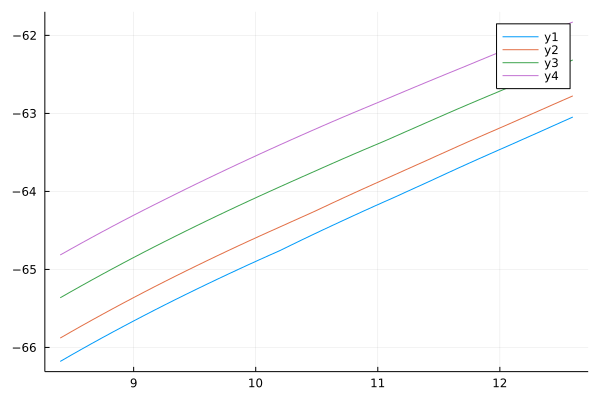

In [139]:
plot(grid_K, grid_V[:,1])
plot!(grid_K, grid_V[:,2])
plot!(grid_K, grid_V[:,3])
plot!(grid_K, grid_V[:,4])

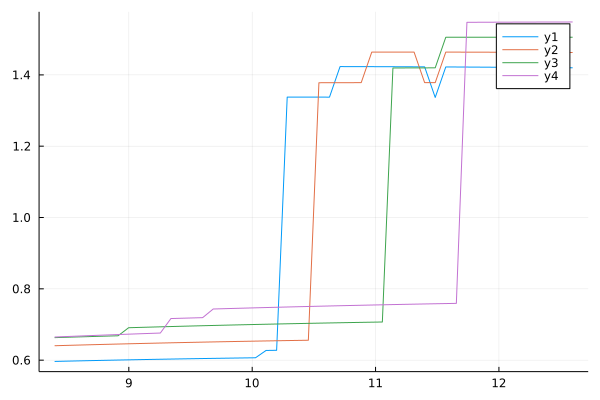

In [149]:
plot(grid_K, grid_c[:,1])
plot!(grid_K, grid_c[:,2])
plot!(grid_K, grid_c[:,3])
plot!(grid_K, grid_c[:,4])

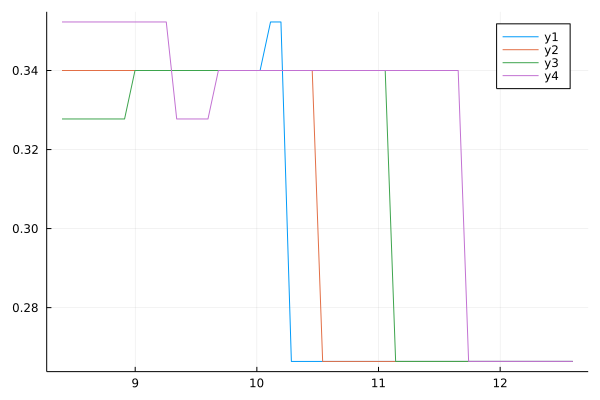

In [150]:
plot(grid_K, grid_l[:,1])
plot!(grid_K, grid_l[:,2])
plot!(grid_K, grid_l[:,3])
plot!(grid_K, grid_l[:,4])

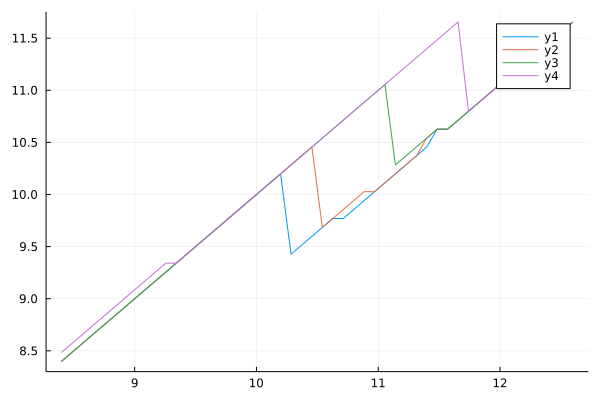

In [151]:
plot(grid_K, grid_kp[:,1])
plot!(grid_K, grid_kp[:,2])
plot!(grid_K, grid_kp[:,3])
plot!(grid_K, grid_kp[:,4])

In [152]:
function simulate(path_z, N=5000)
    k0 = k_ss
    path_k = zeros(N+1)
    path_k[1] = k0
    path_l = zeros(N)
    path_c = zeros(N)
    path_y = zeros(N)
    FN(a, b) = argmin(abs.(a .- b))
    for t in range(1,N,N)
        k_i = FN(grid_K, path_k[Int(t)]) 
        z_i = FN(grid_Z, path_z[Int(t)])
        path_l[Int(t)] = grid_l[k_i, z_i]
        path_c[Int(t)] = grid_c[k_i, z_i]
        path_k[Int(t)+1] = grid_kp[k_i, z_i]
        path_y[Int(t)] = path_z[Int(t)]*path_k[Int(t)]^α*grid_l[k_i, z_i]^(1-α)
    end
    return path_z, path_l, path_c, path_y, path_k
end

path_z, path_l, path_c, path_y, path_k = simulate(path_z);

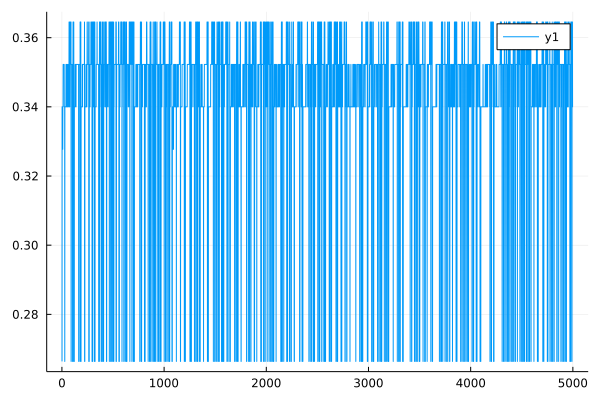

In [144]:
plot(path_l)

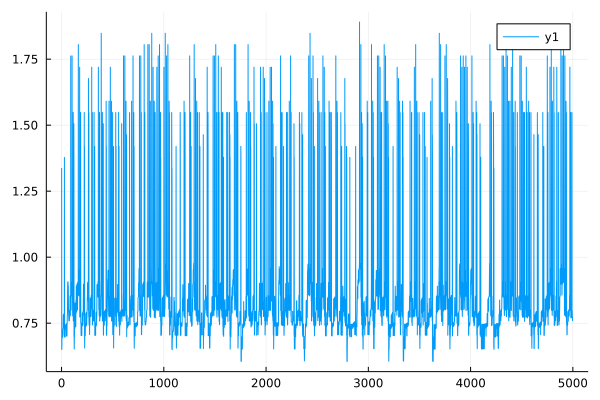

In [153]:
plot(path_c)

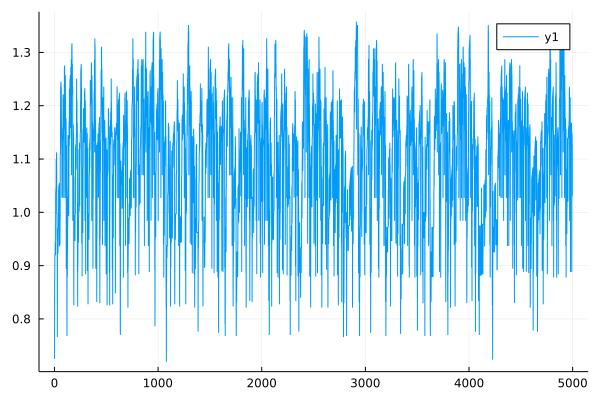

In [146]:
plot(path_y)

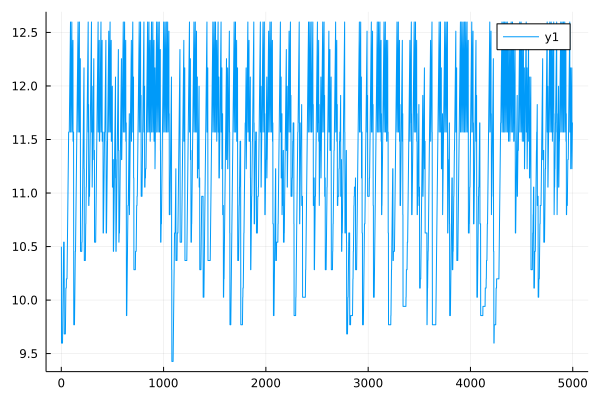

In [148]:
plot(path_k)